In the project, I meticulously followed these steps:
1. Data preprocessing
2. Separation of X and Y variables
3. Splitting the dataset into Training & Testing data
4. Creating KNN Model using KNeighbors Classifier, Decision tree, SVM model using SVC classifier
5. Performance Evaluation: Accuracy Score, Classification Report

Dataset Source:kaggle

In [ ]:
# import necasery laibares
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# read data set
df=pd.read_csv("/content/train_1234.csv")
df

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0.0,INDIVIDUAL,49.0,0.0,31.0,311301.0,6619.0,0.0
1,1450153,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0.0,INDIVIDUAL,109.0,0.0,53.0,182610.0,20885.0,0.0
2,1969101,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0.0,INDIVIDUAL,66.0,0.0,34.0,89801.0,26155.0,0.0
3,6651430,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0.0,INDIVIDUAL,39.0,0.0,40.0,9189.0,60214.0,0.0
4,14354669,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.0,0.0,430.0,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,2794309,27095,10546,5705.699885,58,BAT2575549,14.090745,C,B4,MORTGAGE,...,1.263384,0.704527,0.0,INDIVIDUAL,45.0,0.0,38.0,268111.0,62525.0,0.0
8574,7659519,29206,26605,11512.697880,58,BAT2522922,14.398270,D,E3,RENT,...,0.174416,0.128402,0.0,INDIVIDUAL,135.0,0.0,42.0,60283.0,57666.0,0.0
8575,10452789,19430,6927,10246.612030,59,BAT5629144,7.345330,C,C3,RENT,...,1.043627,0.881993,0.0,INDIVIDUAL,28.0,0.0,30.0,169612.0,27168.0,0.0
8576,7876596,30350,8561,12655.391620,59,BAT2252229,6.327165,A,B5,RENT,...,6.168926,0.289604,0.0,INDIVIDUAL,50.0,0.0,29.0,342662.0,6708.0,0.0


In [ ]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             1
Payment Plan                    1
Loan Title                      1
Debit to Income                 1
Delinquency - two years         1
Inquires - six months           1
Open Account                    1
Public Record                   1
Revolving Balance               1
Revolving Utilities             1
Total Accounts                  1
Initial List Status             1
Total Received Interest         1
Total Received Late Fee         1
Recoveries                      1
Collection Recovery Fee         1
Collection 12 months Medical    1
Application Type                1
Last week Pay 

In [ ]:
# taitile
df.columns

Index(['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Payment Plan', 'Loan Title', 'Debit to Income',
       'Delinquency - two years', 'Inquires - six months', 'Open Account',
       'Public Record', 'Revolving Balance', 'Revolving Utilities',
       'Total Accounts', 'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [ ]:
# columns  & row counts
print ( "columns_count :", df.shape[1])
print ( "rows_count :", df.shape[0])


columns_count : 35
rows_count : 8578


In [ ]:
df.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0.0,INDIVIDUAL,49.0,0.0,31.0,311301.0,6619.0,0.0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0.0,INDIVIDUAL,109.0,0.0,53.0,182610.0,20885.0,0.0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0.0,INDIVIDUAL,66.0,0.0,34.0,89801.0,26155.0,0.0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0.0,INDIVIDUAL,39.0,0.0,40.0,9189.0,60214.0,0.0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.0,0.0,430.0,126029.0,22579.0,0.0


In [ ]:
df.tail()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
8573,2794309,27095,10546,5705.699885,58,BAT2575549,14.090745,C,B4,MORTGAGE,...,1.263384,0.704527,0.0,INDIVIDUAL,45.0,0.0,38.0,268111.0,62525.0,0.0
8574,7659519,29206,26605,11512.697880,58,BAT2522922,14.398270,D,E3,RENT,...,0.174416,0.128402,0.0,INDIVIDUAL,135.0,0.0,42.0,60283.0,57666.0,0.0
8575,10452789,19430,6927,10246.612030,59,BAT5629144,7.345330,C,C3,RENT,...,1.043627,0.881993,0.0,INDIVIDUAL,28.0,0.0,30.0,169612.0,27168.0,0.0
8576,7876596,30350,8561,12655.391620,59,BAT2252229,6.327165,A,B5,RENT,...,6.168926,0.289604,0.0,INDIVIDUAL,50.0,0.0,29.0,342662.0,6708.0,0.0
8577,36119493,23186,32159,8089.046180,58,BAT5547201,13.988651,B,B3,OWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,8.578000e+03,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8578.000000,8577.000000,8577.000000,8577.000000,...,8577.000000,8577.000000,8577.000000,8577.000000,8575.000000,8575.0,8575.000000,8.577000e+03,8577.000000,8577.000000
mean,2.549508e+07,16766.948823,15803.256703,14597.368145,58.175449,11.854654,80428.155957,23.288339,0.338230,0.154017,...,1.242329,57.433701,1.171272,0.021103,71.308105,0.0,146.468571,1.582437e+05,23119.366445,0.098170
std,2.092455e+07,8387.291188,8153.483958,6775.200499,3.298753,3.689441,45107.144651,8.420393,0.800958,0.491241,...,5.421697,343.943329,3.653232,0.143736,43.030511,0.0,743.173248,1.388651e+05,20780.002472,0.297561
min,1.299125e+06,1020.000000,1249.000000,1540.940839,36.000000,5.320159,14788.613940,0.675299,0.000000,0.000000,...,0.000004,0.000372,0.000391,0.000000,0.000000,0.0,1.000000,7.070000e+02,1000.000000,0.000000
25%,6.622270e+06,9929.000000,9222.750000,9844.002217,58.000000,9.347913,51473.172652,16.793399,0.000000,0.000000,...,0.020796,1.633964,0.484257,0.000000,36.000000,0.0,24.000000,4.966500e+04,8183.000000,0.000000
50%,1.781359e+07,15935.500000,13039.500000,12726.528975,59.000000,11.403610,69258.661910,22.755647,0.000000,0.000000,...,0.042977,3.311827,0.784656,0.000000,68.000000,0.0,36.000000,1.161740e+05,16874.000000,0.000000
75%,4.249345e+07,21970.750000,21835.000000,18087.793185,59.000000,14.101370,94479.814062,29.984866,0.000000,0.000000,...,0.072510,5.426186,1.080787,0.000000,105.000000,0.0,46.000000,2.248850e+05,31960.000000,0.000000
max,7.210185e+07,34985.000000,34999.000000,34987.513000,59.000000,26.920449,405697.061600,39.625908,8.000000,4.000000,...,42.595127,4220.932555,54.222788,1.000000,161.000000,0.0,15403.000000,1.052112e+06,192276.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8578 non-null   int64  
 1   Loan Amount                   8578 non-null   int64  
 2   Funded Amount                 8578 non-null   int64  
 3   Funded Amount Investor        8578 non-null   float64
 4   Term                          8578 non-null   int64  
 5   Batch Enrolled                8578 non-null   object 
 6   Interest Rate                 8578 non-null   float64
 7   Grade                         8578 non-null   object 
 8   Sub Grade                     8578 non-null   object 
 9   Employment Duration           8578 non-null   object 
 10  Home Ownership                8578 non-null   float64
 11  Verification Status           8577 non-null   object 
 12  Payment Plan                  8577 non-null   object 
 13  Loa

In [ ]:
# missing value count
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             1
Payment Plan                    1
Loan Title                      1
Debit to Income                 1
Delinquency - two years         1
Inquires - six months           1
Open Account                    1
Public Record                   1
Revolving Balance               1
Revolving Utilities             1
Total Accounts                  1
Initial List Status             1
Total Received Interest         1
Total Received Late Fee         1
Recoveries                      1
Collection Recovery Fee         1
Collection 12 months Medical    1
Application Type                1
Last week Pay 

In [ ]:
df['Last week Pay'].fillna(df['Last week Pay'].mean(),inplace=True)

In [ ]:
df['Accounts Delinquent'].fillna(df['Accounts Delinquent'].mean(),inplace=True)

In [ ]:
df['Total Collection Amount'].fillna(df['Total Collection Amount'].mean(),inplace=True)

In [ ]:
df.isna().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             1
Payment Plan                    1
Loan Title                      1
Debit to Income                 1
Delinquency - two years         1
Inquires - six months           1
Open Account                    1
Public Record                   1
Revolving Balance               1
Revolving Utilities             1
Total Accounts                  1
Initial List Status             1
Total Received Interest         1
Total Received Late Fee         1
Recoveries                      1
Collection Recovery Fee         1
Collection 12 months Medical    1
Application Type                1
Last week Pay 

In [ ]:
# drop unnecessary columns
df=df.drop(['ID'],axis=1)
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,BAT2575549,14.090745,C,B4,MORTGAGE,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,BAT2522922,14.398270,D,E3,RENT,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,BAT5629144,7.345330,C,C3,RENT,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,BAT2252229,6.327165,A,B5,RENT,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
# preprocessing data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df["Batch Enrolled"]=le.fit_transform(df["Batch Enrolled"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,B,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,C,D3,RENT,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,F,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,C,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,C,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,C,B4,MORTGAGE,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,D,E3,RENT,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,C,C3,RENT,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,A,B5,RENT,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Grade"]=le.fit_transform(df["Grade"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,C4,MORTGAGE,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,D3,RENT,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,D4,MORTGAGE,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,C3,MORTGAGE,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,D4,MORTGAGE,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,B4,MORTGAGE,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,E3,RENT,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,C3,RENT,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,B5,RENT,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Sub Grade"]=le.fit_transform(df["Sub Grade"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,MORTGAGE,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,RENT,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,MORTGAGE,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,MORTGAGE,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,MORTGAGE,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,MORTGAGE,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,RENT,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,RENT,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,RENT,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Employment Duration"]=le.fit_transform(df["Employment Duration"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Verification Status"]=le.fit_transform(df["Verification Status"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Payment Plan"]=le.fit_transform(df["Payment Plan"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Loan Title"]=le.fit_transform(df["Loan Title"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Initial List Status"]=le.fit_transform(df["Initial List Status"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,INDIVIDUAL,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,INDIVIDUAL,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,INDIVIDUAL,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,INDIVIDUAL,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,INDIVIDUAL,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,INDIVIDUAL,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,INDIVIDUAL,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,INDIVIDUAL,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,INDIVIDUAL,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Application Type"]=le.fit_transform(df["Application Type"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,0,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,0,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,0,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,0,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,0,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,0,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,0,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,0,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,0,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df["Payment Plan"]=le.fit_transform(df["Payment Plan"])
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,0,49.000000,0.0,31.000000,311301.0,6619.0,0.0
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,0,109.000000,0.0,53.000000,182610.0,20885.0,0.0
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,0,66.000000,0.0,34.000000,89801.0,26155.0,0.0
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,0,39.000000,0.0,40.000000,9189.0,60214.0,0.0
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,0,18.000000,0.0,430.000000,126029.0,22579.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,0,45.000000,0.0,38.000000,268111.0,62525.0,0.0
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,0,135.000000,0.0,42.000000,60283.0,57666.0,0.0
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,0,28.000000,0.0,30.000000,169612.0,27168.0,0.0
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,0,50.000000,0.0,29.000000,342662.0,6708.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8578 entries, 0 to 8577
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   8578 non-null   int64  
 1   Funded Amount                 8578 non-null   int64  
 2   Funded Amount Investor        8578 non-null   float64
 3   Term                          8578 non-null   int64  
 4   Batch Enrolled                8578 non-null   int64  
 5   Interest Rate                 8578 non-null   float64
 6   Grade                         8578 non-null   int64  
 7   Sub Grade                     8578 non-null   int64  
 8   Employment Duration           8578 non-null   int64  
 9   Home Ownership                8578 non-null   float64
 10  Verification Status           8578 non-null   int64  
 11  Payment Plan                  8578 non-null   int64  
 12  Loan Title                    8578 non-null   int64  
 13  Deb

In [ ]:
df["Loan Status"]=df["Loan Status"].replace({0:"no",1:"yes"})
df

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.362860,59,16,11.135007,1,13,0,176346.62670,...,2.498291,0.793724,0.0,0,49.000000,0.0,31.000000,311301.0,6619.0,no
1,3609,11940,12191.996920,59,4,12.237563,2,17,2,39833.92100,...,2.377215,0.974821,0.0,0,109.000000,0.0,53.000000,182610.0,20885.0,no
2,28276,9311,21603.224550,59,11,12.545884,5,18,0,91506.69105,...,4.316277,1.020075,0.0,0,66.000000,0.0,34.000000,89801.0,26155.0,no
3,11170,6954,17877.155850,59,15,16.731201,2,12,0,108286.57590,...,0.107020,0.749971,0.0,0,39.000000,0.0,40.000000,9189.0,60214.0,no
4,16890,13226,13539.926670,59,32,15.008300,2,18,0,44234.82545,...,1294.818751,0.368953,0.0,0,18.000000,0.0,430.000000,126029.0,22579.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8573,27095,10546,5705.699885,58,18,14.090745,2,8,0,66254.50073,...,1.263384,0.704527,0.0,0,45.000000,0.0,38.000000,268111.0,62525.0,no
8574,29206,26605,11512.697880,58,16,14.398270,3,22,2,113856.53140,...,0.174416,0.128402,0.0,0,135.000000,0.0,42.000000,60283.0,57666.0,no
8575,19430,6927,10246.612030,59,36,7.345330,2,12,2,54774.71453,...,1.043627,0.881993,0.0,0,28.000000,0.0,30.000000,169612.0,27168.0,no
8576,30350,8561,12655.391620,59,13,6.327165,0,9,2,73192.57037,...,6.168926,0.289604,0.0,0,50.000000,0.0,29.000000,342662.0,6708.0,no


In [ ]:
df['Loan Status'].unique()

array(['no', 'yes', nan], dtype=object)

In [ ]:
# input data
x=df.iloc[:,:-1].values
x

array([[1.00000000e+04, 3.22360000e+04, 1.23293629e+04, ...,
        3.10000000e+01, 3.11301000e+05, 6.61900000e+03],
       [3.60900000e+03, 1.19400000e+04, 1.21919969e+04, ...,
        5.30000000e+01, 1.82610000e+05, 2.08850000e+04],
       [2.82760000e+04, 9.31100000e+03, 2.16032245e+04, ...,
        3.40000000e+01, 8.98010000e+04, 2.61550000e+04],
       ...,
       [1.94300000e+04, 6.92700000e+03, 1.02466120e+04, ...,
        3.00000000e+01, 1.69612000e+05, 2.71680000e+04],
       [3.03500000e+04, 8.56100000e+03, 1.26553916e+04, ...,
        2.90000000e+01, 3.42662000e+05, 6.70800000e+03],
       [2.31860000e+04, 3.21590000e+04, 8.08904618e+03, ...,
        1.46468571e+02,            nan,            nan]])

In [ ]:
# output data
y=df.iloc[:,-1].values
y

array(['no', 'no', 'no', ..., 'no', 'no', nan], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[3.21900000e+04, 1.53600000e+04, 2.16806452e+04, ...,
        5.70000000e+01, 1.74592000e+05, 5.16970000e+04],
       [2.85440000e+04, 3.15670000e+04, 8.37485679e+03, ...,
        3.80000000e+01, 1.63367000e+05, 3.72300000e+03],
       [1.71030000e+04, 3.42370000e+04, 9.18594783e+03, ...,
        4.00000000e+01, 4.75255000e+05, 2.82960000e+04],
       ...,
       [3.09020000e+04, 2.95590000e+04, 1.33679975e+04, ...,
        4.90000000e+01, 1.69350000e+04, 2.86850000e+04],
       [1.53250000e+04, 6.35500000e+03, 1.19659254e+04, ...,
        3.10000000e+01, 2.19876000e+05, 2.85700000e+04],
       [7.13500000e+03, 1.01080000e+04, 1.24394990e+04, ...,
        4.30000000e+01, 3.61648000e+05, 4.89300000e+03]])

In [ ]:
x_test

array([[2.89000000e+03, 1.67160000e+04, 9.73849826e+03, ...,
        1.90000000e+01, 1.74643000e+05, 2.86700000e+04],
       [1.43550000e+04, 6.36400000e+03, 1.56697339e+04, ...,
        3.70000000e+01, 3.36560000e+04, 1.71740000e+04],
       [2.13920000e+04, 9.48100000e+03, 5.66100908e+03, ...,
        1.40000000e+01, 4.30894000e+05, 5.05840000e+04],
       ...,
       [3.29060000e+04, 1.33560000e+04, 1.65620562e+04, ...,
        3.40000000e+01, 2.83883000e+05, 2.46360000e+04],
       [1.66480000e+04, 7.77200000e+03, 1.73221558e+04, ...,
        4.00000000e+01, 3.81600000e+04, 1.73670000e+04],
       [1.70000000e+04, 2.04600000e+04, 6.34576684e+03, ...,
        3.90000000e+01, 2.69140000e+04, 4.88010000e+04]])

In [ ]:
y_train

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
y_test

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[0.91770941, 0.41632241, 0.60002445, ..., 0.00363589, 0.17240678,
        0.26504632],
       [0.81036361, 0.89799982, 0.20008134, ..., 0.00240229, 0.16127721,
        0.01423597],
       [0.47351686, 0.97735311, 0.22446098, ..., 0.00253214, 0.47051381,
        0.14270478],
       ...,
       [0.87978802, 0.8383214 , 0.35016431, ..., 0.00311648, 0.01609004,
        0.14473849],
       [0.42116885, 0.14869082, 0.30802107, ..., 0.0019478 , 0.21730582,
        0.14413727],
       [0.18003827, 0.26023122, 0.32225566, ..., 0.00272692, 0.3578726 ,
        0.02035279]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbours_model=KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.svm import SVC
svm_model=SVC()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

model name :-  KNeighborsClassifier() 
 ['no' 'no' 'no' ... 'no' 'no' 'no']
[[18268   118]
 [ 1837    16]]
0.9034043183951777
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     18386
         yes       0.12      0.01      0.02      1853

    accuracy                           0.90     20239
   macro avg       0.51      0.50      0.48     20239
weighted avg       0.84      0.90      0.86     20239

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model name :-  SVC() 
 ['no' 'no' 'no' ... 'no' 'no' 'no']
[[18386     0]
 [ 1853     0]]
0.9084440930876031
              precision    recall  f1-score   support

          no       0.91      1.00      0.95     18386
         yes       0.00      0.00      0.00      1853

    accuracy                           0.91     20239
   macro avg       0.45      0.50      0.48     20239
weighted avg       0.83      0.91      0.86     20239

****************************************************************************************************
model name :-  DecisionTreeClassifier() 
 ['no' 'no' 'no' ... 'no' 'yes' 'no']
[[15952  2434]
 [ 1602   251]]
0.8005830327585355
              precision    recall  f1-score   support

          no       0.91      0.87      0.89     18386
         yes       0.09      0.14      0.11      1853

    accuracy                           0.80     20239
   macro avg       0.50      0.50      0.50     20239
weighted avg       0.83      0.80      0.82     20239

*******

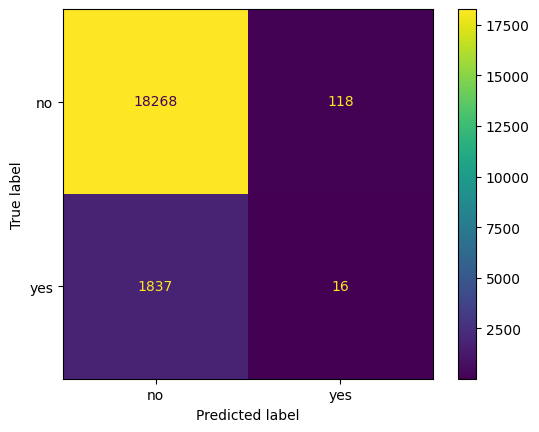

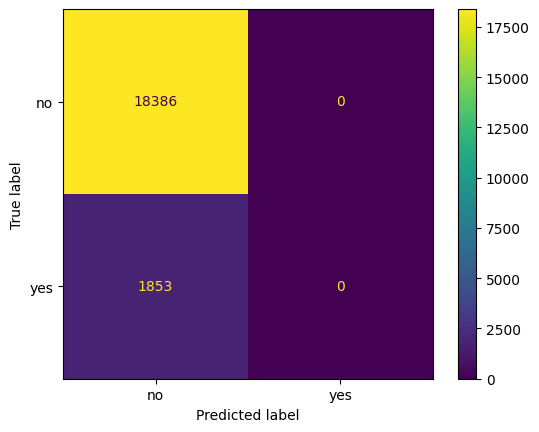

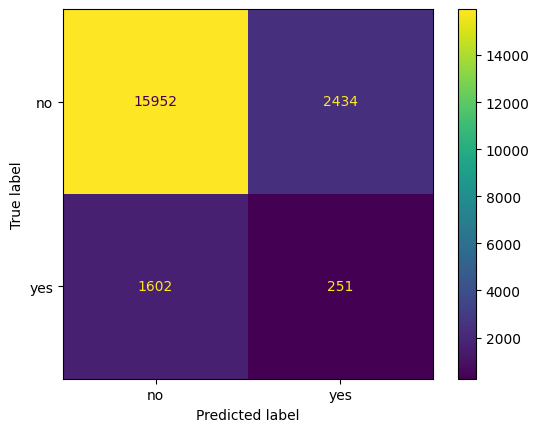

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
model=[neighbours_model,svm_model,tree_model]
for i in model:
  i.fit(x_train,y_train)
  y_prede=i.predict(x_test)
  result=confusion_matrix(y_test,y_prede)
  score=accuracy_score(y_test,y_prede)
  report=classification_report(y_test,y_prede)
  cm=['no','yes']
  cmd=ConfusionMatrixDisplay(result,display_labels=cm)
  print("model name :- ",i,"\n",y_prede)
  print(result)
  print(score)
  print(report)
  print(cmd.plot())
  print("*"*100)